In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import time
import sqlite3

In [3]:
for i in range(10):
    url = 'https://eg.freemeteo.com/weather/cairo/current-weather/location/?gid=360630&language=english&country=egypt'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    weather = soup.find('div', attrs={'class': 'temp'}).get_text()
    weather = float(weather.split('°')[0])
    wind = soup.find('div', attrs={'class': 'wind'}).get_text()
    wind = float(wind.split(' ')[1])
    stats = soup.find('div', attrs={'class': 'stats'}).get_text()
    for el in stats.split(' '):
        if el.endswith('%'):
            humidity = float(el.split('%')[0])
        elif el.endswith('m'):
            visibility = float(el.split('m')[0])
        elif el.endswith('mb'):
            presure = float(el.split('mb')[0])
    now = datetime.now()
    time_now = now.strftime("%d/%m/%Y %H:%M:%S")

    connection = sqlite3.connect("weather.db")
    sql = "INSERT INTO reading (weather,wind,visibility,humidity,presure,time_now) VALUES (?,?,?,?,?,?)"
    data = [weather,wind,visibility,humidity,20,time_now]
    connection.execute(sql, data)
    connection.commit()
    connection.close()
    
    print(f'step number {i}')
    
    time.sleep(2)

step number 0
step number 1
step number 2
step number 3
step number 4
step number 5
step number 6
step number 7
step number 8
step number 9


In [4]:
connection = sqlite3.connect("weather.db")
rows = connection.execute("SELECT * FROM reading").fetchall()
connection.close()

for row in rows:
    print(row)

(31, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:03')
(32, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:06')
(33, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:09')
(34, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:13')
(35, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:16')
(36, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:20')
(37, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:24')
(38, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:31')
(39, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:34')
(40, 29, 17, 10000, 62, 1007, '14/08/2020 22:04:37')
(41, 17, 2, 3000, 100, 20, '04/01/2021 21:23:43')
(42, 17, 2, 3000, 100, 20, '04/01/2021 21:23:45')
(43, 17, 2, 3000, 100, 20, '04/01/2021 21:23:48')
(44, 17, 2, 3000, 100, 20, '04/01/2021 21:23:51')
(45, 17, 2, 3000, 100, 20, '04/01/2021 21:23:54')
(46, 17, 2, 3000, 100, 20, '04/01/2021 21:23:58')
(47, 17, 2, 3000, 100, 20, '04/01/2021 21:24:01')
(48, 17, 2, 3000, 100, 20, '04/01/2021 21:24:03')
(49, 17, 2, 3000, 100, 20, '04/01/2021 21:24:06')
(50, 17, 2, 3000, 10

In [5]:
import pandas as pd

In [6]:
connection = sqlite3.connect("weather.db")
df = pd.read_sql("SELECT * FROM reading", connection)
df

,id,weather,wind,visibility,humidity,presure,time_now
0,31,29,17,10000,62,1007,14/08/2020 22:04:03
1,32,29,17,10000,62,1007,14/08/2020 22:04:06
2,33,29,17,10000,62,1007,14/08/2020 22:04:09
3,34,29,17,10000,62,1007,14/08/2020 22:04:13
4,35,29,17,10000,62,1007,14/08/2020 22:04:16
5,36,29,17,10000,62,1007,14/08/2020 22:04:20
6,37,29,17,10000,62,1007,14/08/2020 22:04:24
7,38,29,17,10000,62,1007,14/08/2020 22:04:31
8,39,29,17,10000,62,1007,14/08/2020 22:04:34
9,40,29,17,10000,62,1007,14/08/2020 22:04:37


In [7]:
df.describe()

,id,weather,wind,visibility,humidity,presure
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,40.50000,23.00000,9.500000,6500.000000,81.000000,513.500000
std,5.91608,6.15587,7.694838,3590.924232,19.493589,506.320317
min,31.00000,17.00000,2.000000,3000.000000,62.000000,20.000000
25%,35.75000,17.00000,2.000000,3000.000000,62.000000,20.000000
50%,40.50000,23.00000,9.500000,6500.000000,81.000000,513.500000
75%,45.25000,29.00000,17.000000,10000.000000,100.000000,1007.000000
max,50.00000,29.00000,17.000000,10000.000000,100.000000,1007.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10 non-null     int64 
 1   weather     10 non-null     int64 
 2   wind        10 non-null     int64 
 3   visibility  10 non-null     int64 
 4   humidity    10 non-null     int64 
 5   presure     10 non-null     int64 
 6   time_now    10 non-null     object
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


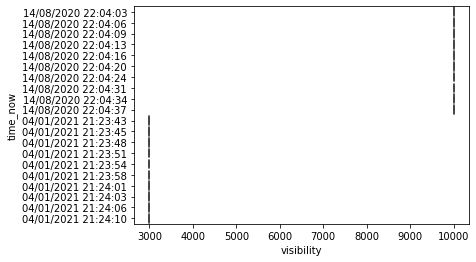

In [9]:
import seaborn as sns

sns.boxplot(y='time_now', x='visibility', data=df)

In [6]:
df = pd.read_csv('data.csv')
df

,id,weather,wind,visibility,humidity,presure,time_now
0,1,25,19,10000,42,1010,07/06/2020 01:18:47
1,2,25,19,10000,42,1010,07/06/2020 01:18:53
2,3,25,19,10000,42,1010,07/06/2020 01:18:59
3,4,25,19,10000,42,1010,07/06/2020 01:19:05
4,5,25,19,10000,42,1010,07/06/2020 01:19:11
5,6,25,19,10000,42,1010,07/06/2020 01:19:17
6,7,25,19,10000,42,1010,07/06/2020 01:19:23
7,8,25,19,10000,42,1010,07/06/2020 01:19:29
8,9,25,19,10000,42,1010,07/06/2020 01:19:35
9,10,25,19,10000,42,1010,07/06/2020 01:19:41


In [7]:
df.describe()

,id,weather,wind,visibility,humidity,presure
count,10.00000,10.0,10.0,10.0,10.0,10.0
mean,5.50000,25.0,19.0,10000.0,42.0,1010.0
std,3.02765,0.0,0.0,0.0,0.0,0.0
min,1.00000,25.0,19.0,10000.0,42.0,1010.0
25%,3.25000,25.0,19.0,10000.0,42.0,1010.0
50%,5.50000,25.0,19.0,10000.0,42.0,1010.0
75%,7.75000,25.0,19.0,10000.0,42.0,1010.0
max,10.00000,25.0,19.0,10000.0,42.0,1010.0


## Great Job!